<a href="https://colab.research.google.com/github/Pdugovich/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

# Primary Assignment

## 1. Load and clean the data (or determine the best method to drop observations when running tests)

In [0]:
import pandas as pd
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, ttest_1samp
import matplotlib.pyplot as plt
import numpy as np

In [83]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-16 21:50:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-09-16 21:50:20 (606 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [84]:
names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=names)
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({'?': np.NaN, 'y':1, 'n': 0})

In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [87]:
# using describe to see the contrast for more easily 
#selecting targets for t-tests
#El salvador aid for rep support, aid to contras for dem support
dem.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,258.000000,239.000000,260.000000,259.000000,255.000000,258.000000,259.000000,263.000000,248.000000,263.000000,255.000000,249.000000,252.000000,257.000000,251.000000,185.000000
mean,0.604651,0.502092,0.888462,0.054054,0.215686,0.476744,0.772201,0.828897,0.758065,0.471483,0.505882,0.144578,0.289683,0.350195,0.637450,0.935135
std,0.489876,0.501045,0.315405,0.226562,0.412106,0.500430,0.420224,0.377317,0.429121,0.500138,0.500949,0.352383,0.454518,0.477962,0.481697,0.246956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
rep.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,165.000000,148.000000,164.000000,165.000000,165.000000,166.000000,162.000000,157.000000,165.000000,165.000000,159.000000,155.000000,158.000000,161.000000,156.000000,146.000000
mean,0.187879,0.506757,0.134146,0.987879,0.951515,0.897590,0.240741,0.152866,0.115152,0.557576,0.132075,0.870968,0.860759,0.981366,0.089744,0.657534
std,0.391804,0.501652,0.341853,0.109760,0.215442,0.304104,0.428859,0.361010,0.320176,0.498186,0.339643,0.336322,0.347298,0.135649,0.286735,0.476168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01

1) Null Hypothesis

There is no difference between Republican and Demcrat support for Aid to Contras

2) Alternative Hypothesis

There is a difference between Republican and Democrat support Aid to Contras.

3) Confidence Level

99%

In [89]:
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [90]:
# 4) T-Test
ttest_ind(dem['aid-to-contras'],rep['aid-to-contras'], nan_policy='omit')

Ttest_indResult(statistic=18.052093200819733, pvalue=2.82471841372357e-54)

4) T-Statistic = 18.05

5) P-Value = 2.82e-54

Conclusion: Due to the p-value being less than 0.01, we can reject the null hypothesis that there is no difference between Republican and Democrat voting on this issue.

## 3) Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01

1) Null Hypothesis

There is no difference between Republican and Demcrat support for El Salvador Aid

2) Alternative Hypothesis

There is a difference between Republican and Democrat support El Salvador Aid.

3) Confidence Level

99%

In [91]:
# 4) T-Test
ttest_ind(rep['el-salvador-aid'],dem['el-salvador-aid'], nan_policy='omit')

Ttest_indResult(statistic=21.13669261173219, pvalue=5.600520111729011e-68)

4) T-Statistic = 21.14

5) P-Value = 5.60e-68

Conclusion: Due to the p-value being less than 0.01, we can reject the null hypothesis that there is no difference between Republican and Democrat voting on this issue.

## 4) Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

1) Null Hypothesis

There is no difference between Republican and Demcrat support for Water Project.

2) Alternative Hypothesis

There is a difference between Republican and Democrat support for Water Project.

3) Confidence Level

99%

In [92]:
# 4) T-Test
ttest_ind(rep['water-project'],dem['water-project'], nan_policy='omit')

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)

4) T-Statistic = 0.09

5) P-Value = 0.93

Conclusion: Due to the p-value being greater than 0.01, we fail to reject the null hypothesis that there is no difference between Republican and Democrat voting on this issue.

## 5) Practicing some single t-tests

1) Null Hypothesis

There is 100% Republican Support for Physican Fee Freeze


2) Alternative Hypothesis

Republicans are not unified in their support for Physician Fee Freeze


3) Confidence Level

95%

In [93]:
# 4) T-Test
ttest_1samp(rep['physician-fee-freeze'], 1, nan_policy='omit')

Ttest_1sampResult(statistic=-1.4185450076223511, pvalue=0.1579292482594923)

4) T-Statistic = -1.42

5) P-Value = 0.16

Conclusion: Due to the p-value being greater than 0.05, we fail to reject the null hypothesis that there is 100% Republican support for a Physician Fee Freeze.

1) Null Hypothesis

There is 100% Democrat support for Education


2) Alternative Hypothesis

Democrats are not unified in their lack of support for Education


3) Confidence Level

95%

In [94]:
# 4) T-Test
ttest_1samp(rep['education'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=32.24127789030702, pvalue=2.295255722861058e-70)

4) T-Statistic = 32.24

5) P-Value = 2.30e-70

Conclusion: Due to the p-value being less than 0.05, we can reject the null hypothesis that there is 0% Democrat support for Education.

# Stretch Goals

## Create a function for t-tests

In [0]:
def dem_rep_t_tester(column):
  return ttest_ind(rep[column],dem[column], nan_policy='omit')

In [0]:
tester_ed = dem_rep_t_tester('education')

In [0]:
tester_p_values = []
for name in df.columns[range(1,17)]:
  tester_p_values.append(dem_rep_t_tester(name)[1])

In [98]:
tester_p_values

[1.613440327937243e-18,
 0.9291556823993485,
 2.0703402795404463e-77,
 1.994262314074344e-177,
 5.600520111729011e-68,
 2.3936722520597287e-20,
 8.521033017443867e-31,
 2.82471841372357e-54,
 5.03079265310811e-47,
 0.08330248490425066,
 1.5759322301054064e-15,
 1.8834203990450192e-64,
 1.2278581709672758e-34,
 9.952342705606092e-47,
 5.997697174347365e-32,
 3.652674361672226e-11]

In [0]:
import seaborn as sns


In [0]:
bins = [0,0.05,1]

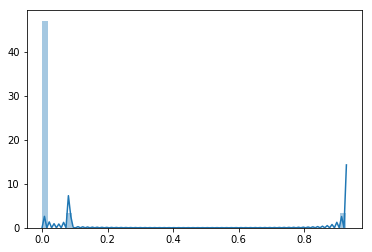

In [101]:
#I thought this graph would be a little interesting, but there isn't much
# in between with these p values
sns.distplot(tester_p_values);